In [41]:
# Data preprocessing 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
heart = np.genfromtxt("heart.csv", delimiter=',', skip_header=1)
X=heart[:, :-1]
y=heart[:, -1]

print(f'X Shape: {X.shape}, y shape: {y.shape}')
print(f'Number of patients with heart disease {np.sum(y)}')
print(f'Percentage of patients with heart disease {(np.sum(y) / X.shape[0]):.3}')

# 80/20 train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=9)

print(f'X Train Shape: {X_train.shape}, y train shape: {y_train.shape}')
print(f'X Test Shape: {X_test.shape}, y test shape: {y_test.shape}')
print(f'Number of patients with heart disease (training) {np.sum(y_train)}')
print(f'Number of patients with heart disease (test) {np.sum(y_test)}')

X Shape: (1025, 13), y shape: (1025,)
Number of patients with heart disease 526.0
Percentage of patients with heart disease 0.513
X Train Shape: (820, 13), y train shape: (820,)
X Test Shape: (205, 13), y test shape: (205,)
Number of patients with heart disease (training) 411.0
Number of patients with heart disease (test) 115.0
[0. 0. 0. ... 0. 1. 0.]


In [2]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(fit_intercept=True, max_iter=1000)
model.fit(X_train, y_train)
print(f'training score={model.score(X_test, y_test)}')

training score=0.8780487804878049


In [3]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_score = gnb.predict_proba(X_test)

print("Naive Bayes score: ",format(gnb.score(X_test, y_test),".4f"))
from sklearn.metrics import confusion_matrix
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, y_pred))

Naive Bayes score:  0.8683
[[ 74  16]
 [ 11 104]]


In [4]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for neighbor in range (1, 20):
    knn = KNeighborsClassifier(n_neighbors=neighbor).fit(X_train, y_train)
    print(f'{neighbor}: {np.round(np.mean(cross_val_score(knn, X_train, y_train, cv=3)),3)}')

1: 0.927
2: 0.844
3: 0.779
4: 0.729
5: 0.689
6: 0.661
7: 0.659
8: 0.663
9: 0.67
10: 0.687
11: 0.69
12: 0.693
13: 0.688
14: 0.706
15: 0.699
16: 0.699
17: 0.691
18: 0.678
19: 0.693


In [5]:
#Accuracy Score for KNN
knn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("P(classification) 9 Neighbors =", np.round(accuracy_score(y_test, y_pred), 3))
print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

P(classification) 9 Neighbors = 0.951
Confusion matrix: 
 [[ 90   0]
 [ 10 105]]


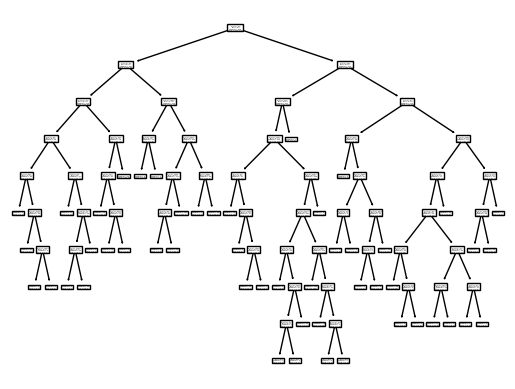

Confusion Matrix: 
[[ 87   3]
 [  0 115]]
Accuracy: 98.54%


In [6]:
# Decision Tree
# fit
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=9)
clf = clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)

#model 
from sklearn.tree import plot_tree
plot_tree(clf)
plt.show()


#accuracy and confusion matrix
from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(X_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(format(acc*100,'.2f')) + '%')

In [46]:
# Deep Neural Net
import tensorflow as tf
from tensorflow import keras

net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(13, input_dim=13, activation = 'relu'),
    tf.keras.layers.Dense(9, activation = 'relu'),
    tf.keras.layers.Dense(9, activation = 'relu'),
    tf.keras.layers.Dense(9, activation = 'relu'),
    tf.keras.layers.Dense(9, activation = 'relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')])
net.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
net.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 13)                182       
                                                                 
 dense_74 (Dense)            (None, 9)                 126       
                                                                 
 dense_75 (Dense)            (None, 9)                 90        
                                                                 
 dense_76 (Dense)            (None, 9)                 90        
                                                                 
 dense_77 (Dense)            (None, 9)                 90        
                                                                 
 dense_78 (Dense)            (None, 1)                 10        
                                                                 
Total params: 588
Trainable params: 588
Non-trainable

In [44]:
# fit the keras model on the dataset
net.fit(X_train, y_train, epochs=150, batch_size=30)

Epoch 1/150
28/28 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 2/150
28/28 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 3/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4744
Epoch 4/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4720
Epoch 5/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 6/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 7/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4720
Epoch 8/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4573
Epoch 9/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4988
Epoch 10/150
28/28 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4915
Epoch 11/

In [45]:
# score
score = net.evaluate(X_test, y_test, verbose=0)
print("Test loss:", format(score[0],".4f"))
print(f'Test accuracy: {score[1]:.3}')

Test loss: 0.6932
Test accuracy: 0.439
